In [28]:
from PyNite import FEModel3D, Visualization

# 👩‍💻 Workbook 01: String and list manipulation

This workbook is about learning how to manually manipulate string data that is read from files.

To do this, you will be reading data from three files: "beam_1.txt", "beam_2.txt", and "beam_3.txt".

The file format of each text file is as follows. Values shown in square brackets `[]` are optional data and may or may not appear in the file.

```python
Length, E, I # Line 0
Vertical (pin) support locations # Line 1
UDL Magnitude[, [Load Start], [Load End]] # Line 2
UDL Magnitude[, [Load Start], [Load End]] # Lines 3+ ...
... # etc.
```

All the lines below the first two lines will be UDL loads. There can be zero, one, or many lines of loads.

File format specifications (aka assumptions you can make):

* The left-hand side of the beam always starts at `0.0` (i.e. it cannot start at a negative x-location)
* If a load line only has one number (i.e. no "Load Start" or "Load End" values), it is assumed to run the entire length of the beam
* If a load line only has two numbers (i.e. no "Load End" value), the load starts at the start point and runs the rest of the length of the beam
* Only the first support will be a "true pin", any remaining supports will be "rollers"

This Workbook is designed to not require using `if/else` statements or `for` loops (those will be coming weeks). This workbook is focused on manually parsing text data from a file and putting each piece of information where it needs to go in the analysis engine.


## Task A

Use the "file opening" template to open the file, "beam_1.txt". Assign the `file.read()` data to a variable named `beam_1_data`. Use `print()` to print `beam_1_data` to the notebook.

Review the description of the file format above and mentally identify each piece of data in the file with what it represents in the description of the file format.

Do the same with "beam_2.txt", except with a variable called `beam_2_data`, after you print it to the notebook, also.

## Task A response

In [16]:
#OPEN FILE FOR BEAM 1 
file_name="beam_1.txt" # Same dir as notebook file
with open(file_name, 'r')as file:
    beam_1_data=file.read()
    
file_name="beam_2_us.txt" # Same dir as notebook file
with open(file_name, 'r')as file:
    beam_2_data=file.read()

#print data from files
print(beam_1_data)
print(beam_2_data)


4800, 200000, 437000000
0, 3000
10, 2000
228, 28000, 756
63, 100, 200
15, 0, 0
35, 0, 0


# Task B

Use `.split()` to split the string in `beam_1_data` into separate lines. Access each line in the resulting list by using indexing and print each line to the notebook separately.

Following that, if you see that any of the lines in the list is a string with comma-separated values, split those values up into another list by splitting that line with `.split()` using the appropriate character sequence.

## Task B response

In [95]:
print(beam_1_data)

4800, 200000, 437000000
0, 3000
10, 2000


In [135]:
#Review format of Data
beam_1_data


'4800, 200000, 437000000\n0, 3000\n10, 2000'

In [133]:
list=beam_1_data.split(sep="\n")
list

['4800, 200000, 437000000', '0, 3000', '10, 2000']

# Task C

Using a combination of splitting and indexing, assign each piece of data in the "beam_1.txt" file to an appropriately named variable.

For example, you might extract the length from the file and assign it to a variable called `length`. If there are two support locations, they could be `support_location_1` and `support_location_2`, etc.

Try reducing the amount you have to type by assigning intermediary values (e.g. the list of split lines) to intermediary variable names.

Check the type of your variables by printing the result of `type(<variable_name>)`. Are your "numbers" numbers?

You can convert strings of either integers or floating point values by using the `float()` function. This will "cast" the string data into float data.

e.g. 
```python
length = float(length)
```


## Task C response

In [ ]:
#Length, E, I # Line 0
#Vertical (pin) support locations # Line 1
#UDL Magnitude[, [Load Start], [Load End]] # Line 2
#UDL Magnitude[, [Load Start], [Load End]] # Lines 3+

In [154]:
#break off first line of list
LEI=list[0]
split_LEI=LEI.split(sep=",")

L=split_LEI[0]
E=split_LEI[1]
I=split_LEI[2]

In [120]:
#break off second line of list
vert=list[1]
split_vert=vert.split(sep=",")

vert_P1=split_vert[0]
vert_P2=split_vert[1]

' 3000'

In [143]:
#break off third line of list
udl=list[2]
split_udl=udl.split(sep=",")

udl_mag=split_udl[0]
udl_start=split_udl[1]

In [144]:
print(f'L:{L}\nE:{E}\nI:{I}\nvert_P1:{vert_P1}\nvert_P2:{vert_P2}\nudl_mag:{udl_mag}\nudl_start{udl_start}')

L:4800.0
E:4800.0
I:4800.0
vert_P1:0.0
vert_P2:3000.0
udl_mag:10
udl_start 2000


# Task D

By combining the work you have done in the cells above, copy-and-paste them into the cell below to create the beginning of a script to read beam data from a text file. Then, using that data, create an `FEModel3D` using `PyNite`.

Feel free to refer back to your Workbook 01 and the PyNite reference guide.

Putting it all together, you will be performing the following:

1. Read the contents of the file using `.read()` and store the resulting string in a variable called `beam_1_data`.
2. Using the information about the file format described above, use string methods, list methods, and indexing to extract data from the file. Create the following variables:
* `length`
* `E`
* `Iz`
* Supports
    * Create separate variables for each support location, e.g. `support_location_1`, `support_location_2`, etc.
    * `support_location_...`
* Loads
    * Create separate variables for each load, e.g. `load_magnitude_1`, `load_magnitude_2`, etc.
    * `load_magnitude_...`
    * `load_start_...` (if applicable)
    * `load_end_...` (if applicable)

3. Create a new `FEModel3D` object using the variables containing the data you read from the file. 

4. Run an analysis of the beam model. Print reaction loads, plot the shear force, bending moment diagrams, and displacement.

## Task D Response

In [155]:
#OPEN FILE FOR BEAM 1 
file_name="beam_1.txt" # Same dir as notebook file
with open(file_name, 'r')as file:
    beam_1_data=file.read()
    
#split list by line
list=beam_1_data.split(sep="\n")

#line1
LEI=list[0]
split_LEI=LEI.split(sep=",")
#variables
L=split_LEI[0]
L=float(L)
E=split_LEI[1]
E=float(E)
I=split_LEI[2]
I=float(I)

#line2
vert=list[1]
split_vert=vert.split(sep=",")
#variables
vert_P1=split_vert[0]
vert_P1=float(vert_P1)
vert_P2=split_vert[1]
vert_P2=float(vert_P2)
    
#line3
udl=list[2]
split_udl=udl.split(sep=",")
#variables
udl_mag=split_udl[0]
udl_mag=float(udl_mag)
udl_start=split_udl[1]
udl_start=float(udl_start)
    
#print variables for reference
print(f'L:{L}\nE:{E}\nI:{I}\nvert_P1:{vert_P1}\nvert_P2:{vert_P2}\nudl_mag:{udl_mag}\nudl_start{udl_start}')


L:4800.0
E:200000.0
I:437000000.0
vert_P1:0.0
vert_P2:3000.0
udl_mag:10.0
udl_start2000.0


+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+---------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |  Sum MZ  | Sum RMZ |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+---------+
|       LC1        |   0    |   0    | -3.42e+03 | 3.42e+03 |   0    |   0    |   0    |    0    |   0    |    0    | -3.9e+05 | 3.9e+05 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+---------+



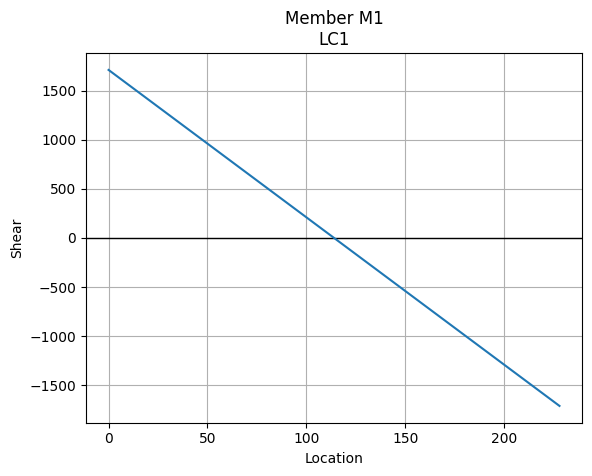

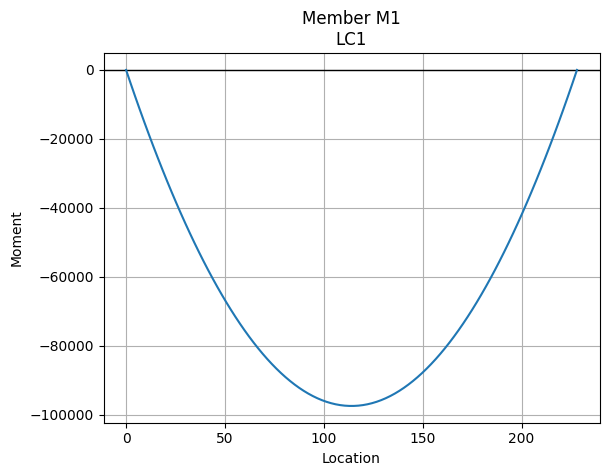

In [180]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

beam_model = FEModel3D() # Creates an empty model

beam_model.add_node(name="node1", X=0, Y=0, Z=0) # Change the model by adding nodes
beam_model.add_node("node2", vert_P2, 0, 0)
beam_model.add_node("node3", L, 0, 0)

beam_model.add_member(name="M1", i_node="node1", j_node="node3", E=E, G=77e3, Iy=I, Iz=I, J=30e3, A=1500)

beam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model.def_support("node3", False, True, True, False, False, False)

beam_model.add_load_combo(name="LC1", factors={"Load": 1})

beam_model.add_member_dist_load(Member="M1", Direction="Fy", w1=-udl_mag, w2=-udl_mag, x1=udl_start, x2=L, case="Load")

beam_model.analyze(check_statics=True) # Changes the model by performing the analysis and adding analysis results

beam_model.Members['M1'].plot_shear(Direction="Fy", combo_name="LC1", n_points=100)
beam_model.Members['M1'].plot_moment(Direction="Mz", combo_name="LC1", n_points=100)

render_model(beam_model, combo_name='LC1', annotation_size=100)

# Task E

Perform the same instructions from **Task D** with "beam_2.txt" except call your variable `beam_2_data`.

Save yourself some time by copy-and-paste-ing your code from **Task D** and try modifying it to make it work. Note, the number of supports and number of loads are different in "beam_2.txt".

## Task E Response

In [168]:
#OPEN FILE FOR BEAM 2 
file_name="beam_2_us.txt" # Same dir as notebook file
with open(file_name, 'r')as file:
    beam_2_data=file.read()
    
#split list by line
list=beam_2_data.split(sep="\n")

#line1
LEI=list[0]
split_LEI=LEI.split(sep=",")
#variables
L=split_LEI[0]
L=float(L)
E=split_LEI[1]
E=float(E)
I=split_LEI[2]
I=float(I)

#line2
vert=list[1]
split_vert=vert.split(sep=",")
#variables
vert_P1=split_vert[0]
vert_P1=float(vert_P1)
vert_P2=split_vert[1]
vert_P2=float(vert_P2)
vert_P3=split_vert[2]
vert_P3=float(vert_P3)
    
    
#line3
udl=list[2]
split_udl=udl.split(sep=",")
#variables
udl_mag_1=split_udl[0]
udl_mag_1=float(udl_mag_1)
udl_start_1=split_udl[1]
udl_start_1=float(udl_start_1)
udl_end_1=split_udl[2]
udl_end_1=float(udl_end_1)

#line4
udl=list[3]
split_udl=udl.split(sep=",")
#variables
udl_mag_2=split_udl[0]
udl_mag_2=float(udl_mag_2)
udl_start_2=split_udl[1]
udl_start_2=float(udl_start_2)
udl_end_2=split_udl[2]
udl_end_2=float(udl_end_2)
    
#print variables for reference
print(f'L:{L}\nE:{E}\nI:{I}\nvert_P1:{vert_P1}\nvert_P2:{vert_P2}\nvert_P3:{vert_P3}\nudl_mag_1:{udl_mag_1}\nudl_start_1:{udl_start_1}\nudl_end_1:{udl_end_1}\nudl_mag_2:{udl_mag_2}\nudl_start_2:{udl_start_2}\nudl_end_2:{udl_end_2}')

L:228.0
E:28000.0
I:756.0
vert_P1:63.0
vert_P2:100.0
vert_P3:200.0
udl_mag_1:15.0
udl_start_1:0.0
udl_end_1:0.0
udl_mag_2:35.0
udl_start_2:0.0
udl_end_2:0.0


+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+---------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |  Sum MZ  | Sum RMZ |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+---------+
|       LC1        |   0    |   0    | -1.14e+04 | 1.14e+04 |   0    |   0    |   0    |    0    |   0    |    0    | -1.3e+06 | 1.3e+06 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+---------+



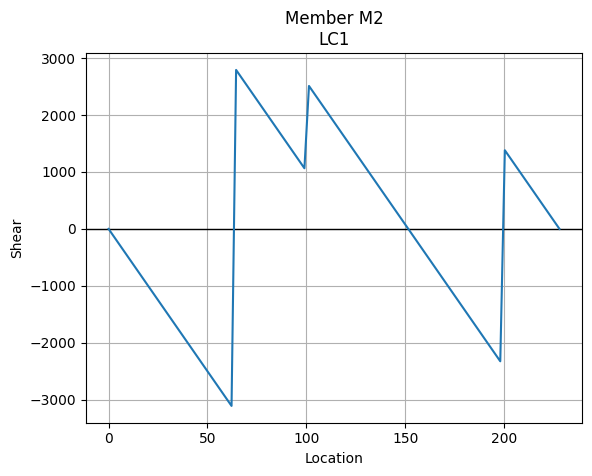

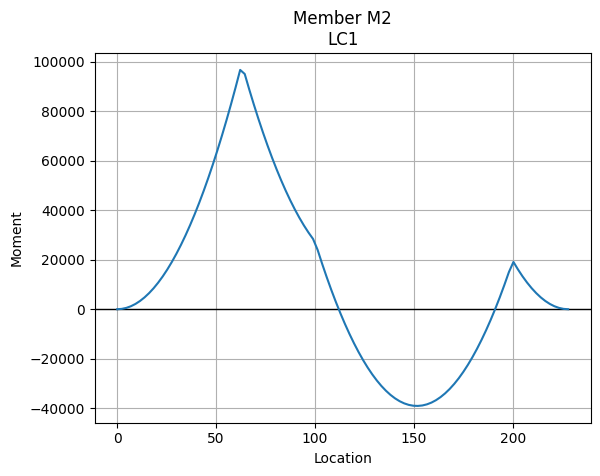

In [200]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

beam_model_2 = FEModel3D() # Creates an empty model

beam_model_2.add_node(name="node1", X=0, Y=0, Z=0) # Change the model by adding nodes
beam_model_2.add_node("node2", vert_P1, 0, 0)
beam_model_2.add_node("node3", vert_P2, 0, 0)
beam_model_2.add_node("node4", vert_P3, 0, 0)
beam_model_2.add_node("node5", L, 0, 0)

beam_model_2.add_member(name="M2", i_node="node1", j_node="node5", E=E, G=77e3, Iy=I, Iz=I, J=30e3, A=1500)

beam_model_2.def_support("node2", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model_2.def_support("node3", False, True, True, False, False, False)
beam_model_2.def_support("node4", False, True, True, False, False, False)

beam_model_2.add_load_combo(name="LC1", factors={"LoadA": 1,"LoadB": 1})

beam_model_2.add_member_dist_load(Member="M2", Direction="Fy", w1=-udl_mag_1, w2=-udl_mag_1,case="LoadA")
beam_model_2.add_member_dist_load(Member="M2", Direction="Fy", w1=-udl_mag_2, w2=-udl_mag_2,case="LoadB")

beam_model_2.analyze(check_statics=True) # Changes the model by performing the analysis and adding analysis results

beam_model_2.Members['M2'].plot_shear(Direction="Fy", combo_name="LC1", n_points=100)
beam_model_2.Members['M2'].plot_moment(Direction="Mz", combo_name="LC1", n_points=100)

render_model(beam_model_2, combo_name='LC1', annotation_size=10, labels=True, deformed_shape=True)

# Task F

1. Make a duplicate of the file "beam_1.txt" and call it "beam_3.txt". 
2. Make a duplicate of "beam_2.txt" and call it "beam_4.txt"
3. Change some of the values in "beam_3.txt" and change your **Task D** script to run the data in "beam_3.txt" to see some new results
4. Do the same with "beam_4.txt" and your **Task E** script to see some new results
5. What happens if you try to run the files "beam_1.txt" or "beam_3.txt" in your **Task E** script?

# Workbook 01 Reflections

By only using `str` and `list` we are able to perform a basic parse of the data in each file. However, because the data in each file are in _slightly_ different locations, our scripts only work for files that are formatted exactly so.

This is where we start. Next week we will add looping into our process which will reduce the amount of code we write _and_ will make our a code a little bit more "robust" (less prone to "breaking").

# 🦸‍ Submit Workbook 01
Whew! Congratulations on getting through Workbook 01. Was some of that work repetitive?  Maybe you started asking yourself, "Is there a better way to do this?"

Of course there is :)